In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [2]:
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
# font_size = 16
# plt.rcParams['font.size'] = font_size
# plt.rcParams['text.usetex'] = True

## Fourier Transform in Finite Volume Method with modified wave number

This section is to relate Fourier transform coefficient and wave number with finite volume method.

```{admonition} Question
What is an appropriate variance for the initial condition?
```

In [3]:
Nx = 128
j = np.arange(Nx)
xx = np.linspace(-np.pi,np.pi,Nx+1)
Lx = xx[-1] - xx[0]
xx = xx[:-1]
dx = xx[1] - xx[0]
dt = 0.1
nu = 0.01
# U = np.sin(xx-np.pi/2)
U = np.zeros(Nx)+1
kappa = 2*np.pi/Lx * j

Nt = 10
t_total = 0
ic = np.exp(-xx**2/0.1)

# Periodic BC

In [4]:
# Finite difference
def finite_difference_periodic(T, U):
    D = np.diag(-2*np.ones(Nx)) + np.diag(np.ones(Nx-1),1) + np.diag(np.ones(Nx-1),-1)
    D[0, -1] = 1
    D[-1, 0] = 1
    D = D/dx/dx * dt * nu
    D = np.eye(Nx) - D

    for it in range(Nt):
        RHS = T - U*dt* (T - np.roll(T, 1))/dx
        T_new = np.linalg.solve(D, RHS)
        T = T_new
    return T_new
    

In [5]:
# Fourier method
def fourier(T, U, t_total=0):
    kappa = 2*np.pi/Lx*k
    kappa_star = 2*abs(np.sin(0.5*kappa*dx))/dx

    for it in range(Nt):
        RHS = T - U*dt* (T - np.roll(T, 1))/dx
        RHS_hat = fft(RHS)
        A = np.diag(1+nu*dt*kappa_star**2)
        T_hat_new = np.linalg.solve(A, RHS_hat)
        T = ifft(T_hat_new)
    t_total += Nt
    return T, RHS_hat, t_total

In [6]:
def compare_fvm(xx, T_fourier, T_FVM, velocity, t_total=0):
    if t_total !=0 :
        T_fourier, R, t_total = fourier(T_fourier, velocity, t_total)
        T_FVM = finite_difference_periodic(T_FVM, velocity)
    else:
        T = ic
        R = fft(T - velocity*dt* (T - np.roll(T, 1))/dx)
        t_total += Nt


    fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=150)
    axes = axes.flatten()
    axes[0].plot(xx, T_fourier, label='FM', color='black', alpha=0.4, linewidth=1)
    axes[0].scatter(xx, T_FVM, label='FD', marker='x', s=7, alpha=.7, color='red')
    axes[0].set_ylim(-0.2, 1)
    axes[0].set_title('Concentration')
    # axes[0].legend()

    axes[1].plot(xx, U, color='black', alpha=0.4, linewidth=1)
    axes[1].set_title('velocity')

    axes[2].plot(np.real(R), color='black', alpha=0.4, linewidth=1)
    axes[2].set_title('Real part of RHS')

    axes[3].plot(np.imag(R), color='black', alpha=0.4, linewidth=1)
    axes[3].set_title('Imaginary part of RHS')
    return fig, t_total, T_fourier, T_FVM

# Dirichlet BC

In [7]:
# Finite difference
def finite_difference_Dirichlet(T, U):
    D = np.diag(-2*np.ones(Nx)) + np.diag(np.ones(Nx-1),1) + np.diag(np.ones(Nx-1),-1)
    D = D/dx/dx * dt * nu
    D = np.eye(Nx) - D
    D[0, :] = 0
    D[-1, :] = 0
    D[:2, 0] = 1/2
    D[-1, -2:] = 1/2
    # D[:1, 0] = 1/2
    # D[-1, -1:] = 1/2

    
    T_lbc = 0
    T_ubc = 0

    for it in range(Nt):
        RHS = T - U*dt* (T - np.roll(T, 1))/dx
        RHS[0] = T_lbc
        RHS[-1] = T_ubc
        T_new = np.linalg.solve(D, RHS)
        T = T_new
    return T_new
    

In [8]:
CFL = np.max(abs(U)*dt/dx)
print('CFl = %.3f' % CFL)

# IC
T_fourier = ic
T_FVM = ic
T_dirichlet = ic

k = np.arange(Nx)
# U = np.sin(xx-np.pi/2)

CFl = 2.037


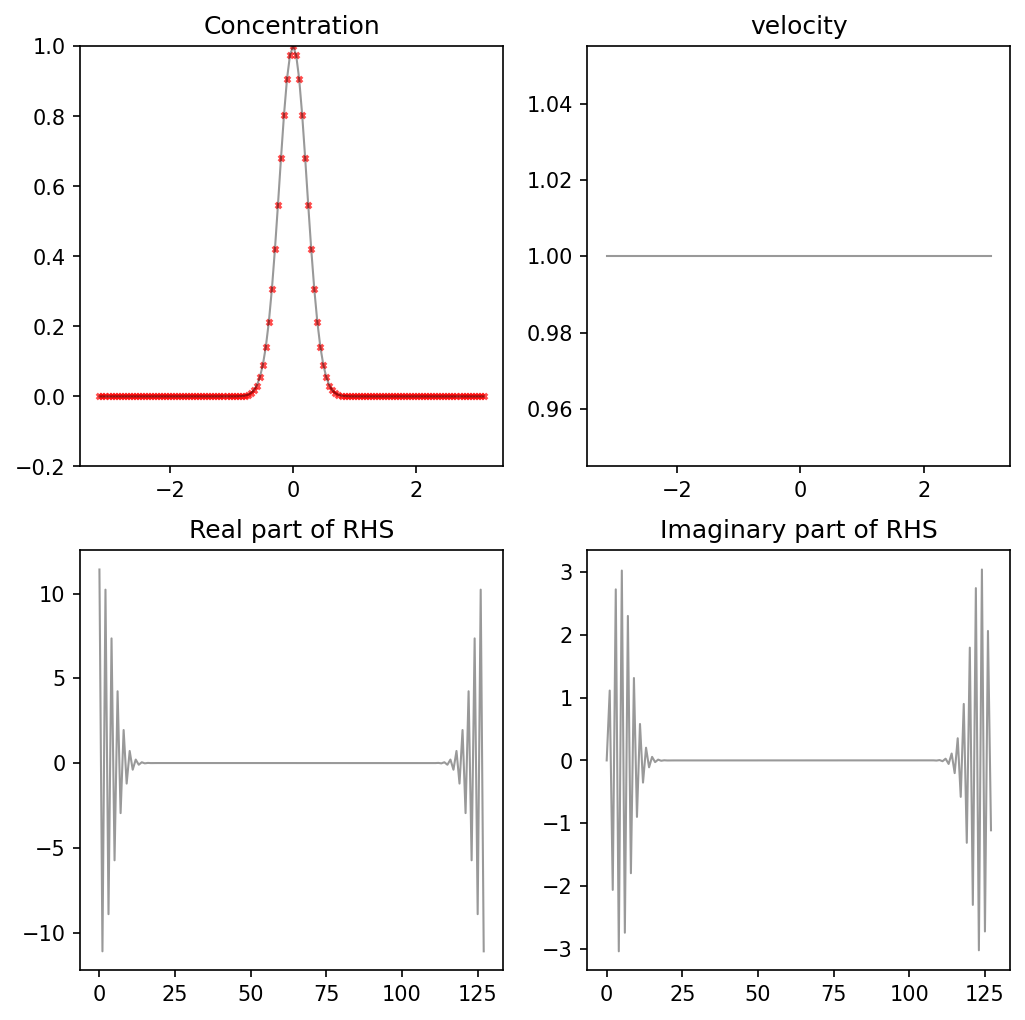

In [9]:
fig, t_total, T_fourier, T_FVM  = compare_fvm(xx, T_fourier, T_FVM, U, t_total)

(-1.0, 1.2)

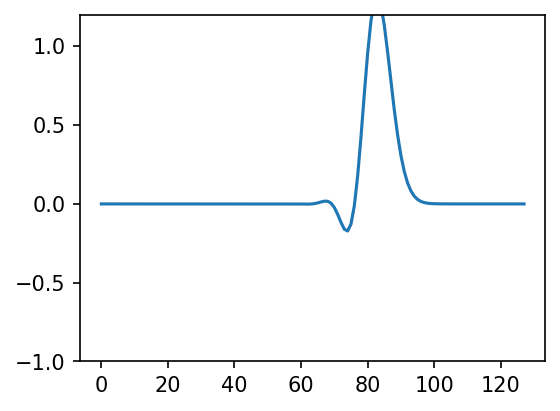

In [10]:
T_dirichlet = finite_difference_Dirichlet(T_dirichlet, U)

fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.plot(T_dirichlet)
ax.set_ylim(-1, 1.2)
